<a href="https://colab.research.google.com/github/Kairu-09/Extensions/blob/master/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Write your code here to read the data


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
# Write your code here to read the data
FoodHub = pd.read_csv("/content/drive/MyDrive/foodhub_order.csv")

In [7]:
# Write your code here to view the first 5 rows
FoodHub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [8]:
# Write your code here
num_rows, num_columns = FoodHub.shape
print("There are {} Number of rows. ".format(num_rows))
print("There are {} Number of Columns. ".format(num_columns))

There are 1898 Number of rows. 
There are 9 Number of Columns. 


#### Observations:
There are 1898 Number of rows and 9 Number of Columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [9]:
# Write your code here
FoodHub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
order_id, customer_id, food_preparation_time and delivery_time have datatype of int64 which is int while resturant_name, cuisine_type, day_of_the_week and rating have dataype of object which is string and finally cost_of_the_order is of datatype float64 which is float

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
FoodHub.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [11]:
# Write your code here
#Yes
FoodHub['rating'].replace(['Not given'], np.nan, inplace=True)
FoodHub['rating'] = FoodHub['rating'].astype(float)#.astype('Int64')
FoodHub.info()
FoodHub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


#### Observations:
There are missing values after chnage rating to the right datatype


In [12]:
FoodHub.groupby(['restaurant_name','cuisine_type','day_of_the_week'])[['rating']].mean()

rating
restaurant_name  cuisine_type   day_of_the_week        
'wichcraft       American       Weekday            5.00
12 Chairs        Middle Eastern Weekday            4.50
                                Weekend             NaN
5 Napkin Burger  American       Weekday             NaN
                                Weekend            4.00
...                                                 ...
da Umberto       Italian        Weekday            5.00
                                Weekend             NaN
ilili Restaurant Middle Eastern Weekday            4.25
                                Weekend            4.00
indikitch        Indian         Weekend            4.50

[282 rows x 1 columns]

In [13]:
FoodHub['rating'] = FoodHub['rating'].fillna(FoodHub.groupby(['restaurant_name', 'cuisine_type', 'day_of_the_week'])['rating'].transform('mean'))
FoodHub.info()
FoodHub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1833 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.090909,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
FoodHub.groupby(['restaurant_name'])[['rating']].mean()

,rating
restaurant_name,
'wichcraft,5.000
12 Chairs,4.500
5 Napkin Burger,4.000
67 Burger,5.000
Alidoro,NaN
...,...
Zero Otto Nove,4.000
brgr,3.000
da Umberto,5.000


In [15]:
FoodHub.dropna(inplace=True)
FoodHub.info()
FoodHub.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1833 entries, 1 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1833 non-null   int64  
 1   customer_id            1833 non-null   int64  
 2   restaurant_name        1833 non-null   object 
 3   cuisine_type           1833 non-null   object 
 4   cost_of_the_order      1833 non-null   float64
 5   day_of_the_week        1833 non-null   object 
 6   rating                 1833 non-null   float64
 7   food_preparation_time  1833 non-null   int64  
 8   delivery_time          1833 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 143.2+ KB


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.090909,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.000000,20,24


In [16]:
# Write your code here
FoodHub.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1833.0,1.477496e+06,547.050954,1476547.00,1477024.00,1.477497e+06,1477972.00,1478444.00
customer_id,1833.0,1.702273e+05,113151.905441,1311.00,77540.00,1.283530e+05,268365.00,405334.00
cost_of_the_order,1833.0,1.647842e+01,7.449356,4.47,12.08,1.412000e+01,22.26,35.41
rating,1833.0,4.341339e+00,0.628295,3.00,4.00,4.302326e+00,5.00,5.00
food_preparation_time,1833.0,2.735952e+01,4.635636,20.00,23.00,2.700000e+01,31.00,35.00
delivery_time,1833.0,2.414348e+01,4.962813,15.00,20.00,2.500000e+01,28.00,33.00


#### Observations:
Minimum time = 20

Average time = 27

Maximum time = 35

### **Question 5:** How many orders are not rated? [1 mark]

In [17]:
# Write the code here
1898-1162

736

#### Observations:
Before the treatment, there were 1898 -1162 = 736 without Given Values,

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

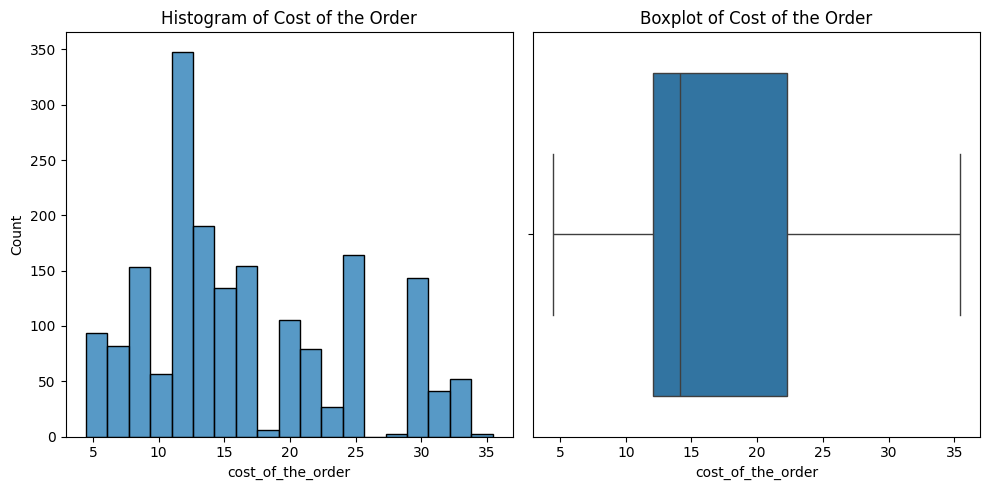

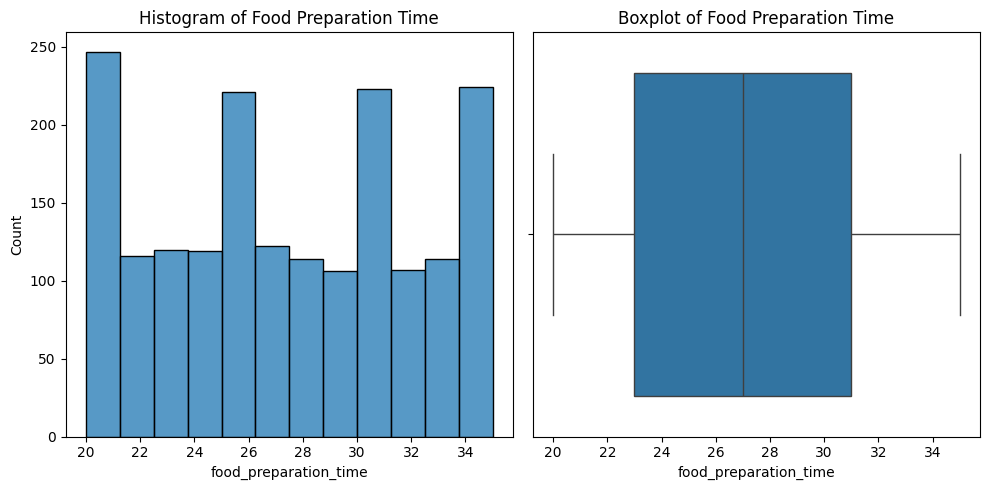

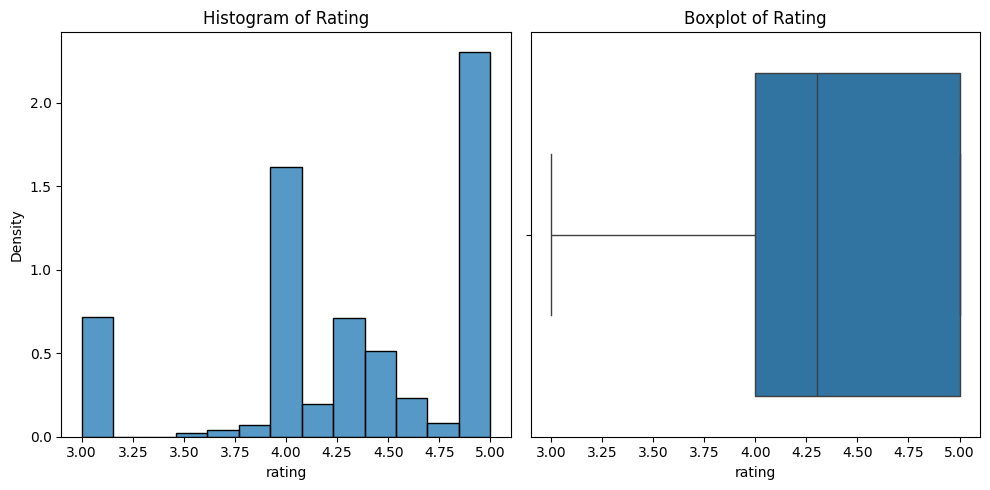

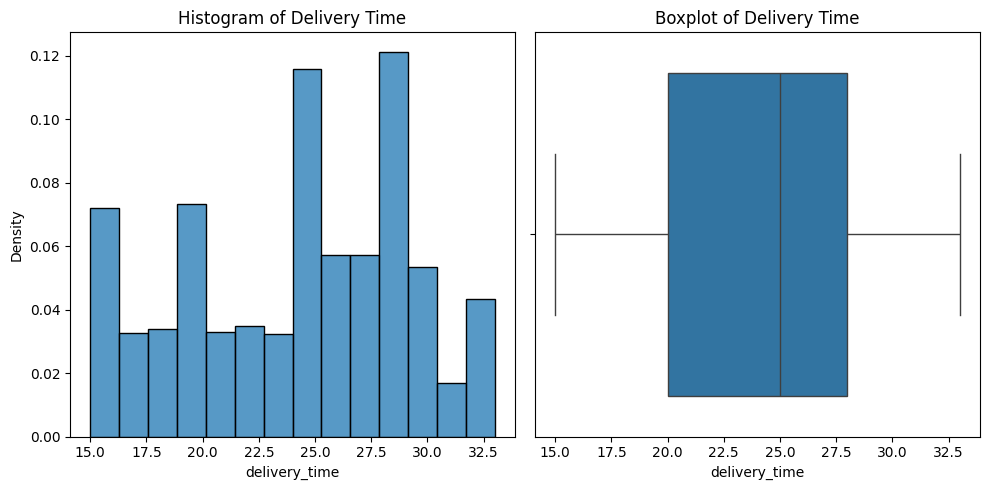

In [19]:
# Write the code here

# Histogram and boxplot for 'cost_of_the_order'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=FoodHub, x='cost_of_the_order')
plt.title('Histogram of Cost of the Order')

plt.subplot(1, 2, 2)
sns.boxplot(data=FoodHub, x='cost_of_the_order')
plt.title('Boxplot of Cost of the Order')

plt.tight_layout()
plt.show()

# Histogram and boxplot for 'food_preparation_time'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=FoodHub, x='food_preparation_time')
plt.title('Histogram of Food Preparation Time')

plt.subplot(1, 2, 2)
sns.boxplot(data=FoodHub, x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')

plt.tight_layout()
plt.show()

# Histogram and boxplot for 'Rating'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=FoodHub, x='rating', stat='density')
plt.title('Histogram of Rating')

plt.subplot(1, 2, 2)
sns.boxplot(data=FoodHub, x='rating')
plt.title('Boxplot of Rating')

plt.tight_layout()
plt.show()

# Histogram and boxplot for 'delivery_time'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=FoodHub, x='delivery_time', stat='density')
plt.title('Histogram of Delivery Time')

plt.subplot(1, 2, 2)
sns.boxplot(data=FoodHub, x='delivery_time')
plt.title('Boxplot of Delivery Time')

plt.tight_layout()
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Write the code here
#Count the occurrence of the top 5 restaurants
top_restaurants = FoodHub['restaurant_name'].value_counts().head(5)
#Display the Names of the Top 5 Restaurants
print(top_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here
#Filter weekend information
weekend_info = FoodHub[(FoodHub['day_of_the_week'] =='Weekend')]
#count occurence of each cuisine type and save the name and counts
cuisine_counts = weekend_info['cuisine_type'].value_counts().head(1)
#Display the name and count of most popular cusine type
print(cuisine_counts)

cuisine_type
American    409
Name: count, dtype: int64


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here

# Filter data for orders with cost greater than $20
orders_greater_than_20 = FoodHub[FoodHub['cost_of_the_order'] > 20]

num_of_orders_greater_than_20 = len(orders_greater_than_20)
# Count the total number of orders
total_orders = len(FoodHub)

print(total_orders)
# Calculate the percentage of orders that cost more than $20
percentage_of_orders_greater_than_20 = (num_of_orders_greater_than_20 / total_orders) * 100

print("Percentage of orders costing more than $20:", percentage_of_orders_greater_than_20)


1833
Percentage of orders costing more than $20: 28.96890343698854


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

The Mean delivery time is:  24.143480632842333


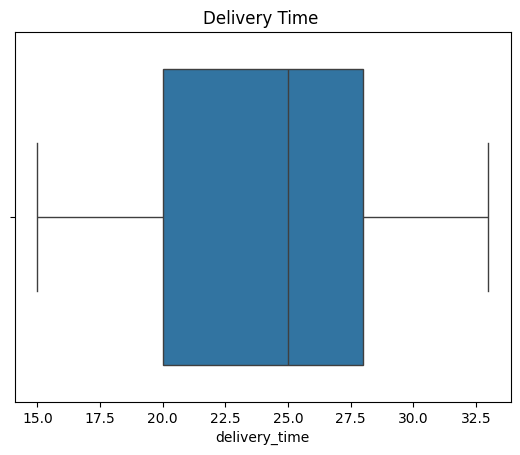

In [23]:
# Write the code here
mean_delivery_time = FoodHub['delivery_time'].mean()
print("The Mean delivery time is: ", mean_delivery_time)
sns.boxplot(data=FoodHub, x='delivery_time')
plt.title('Delivery Time ')
plt.show()

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Write the code here
top_3_customers = FoodHub['customer_id'].value_counts().head(3)
#Display the Names of the Top 5 Restaurants
print(top_3_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


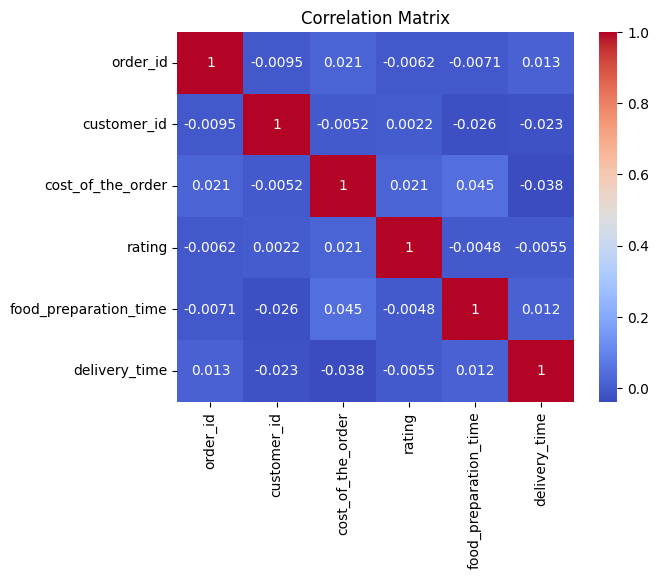

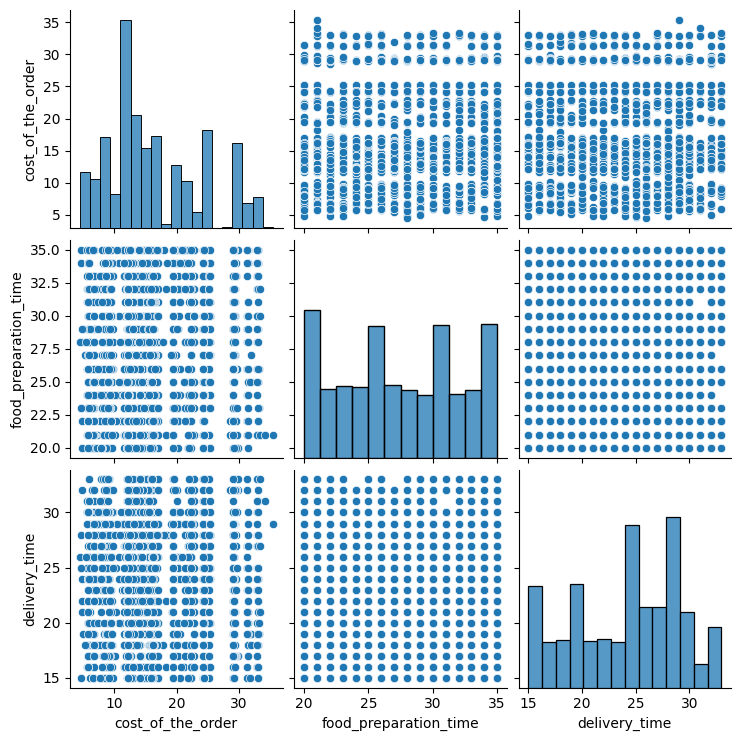

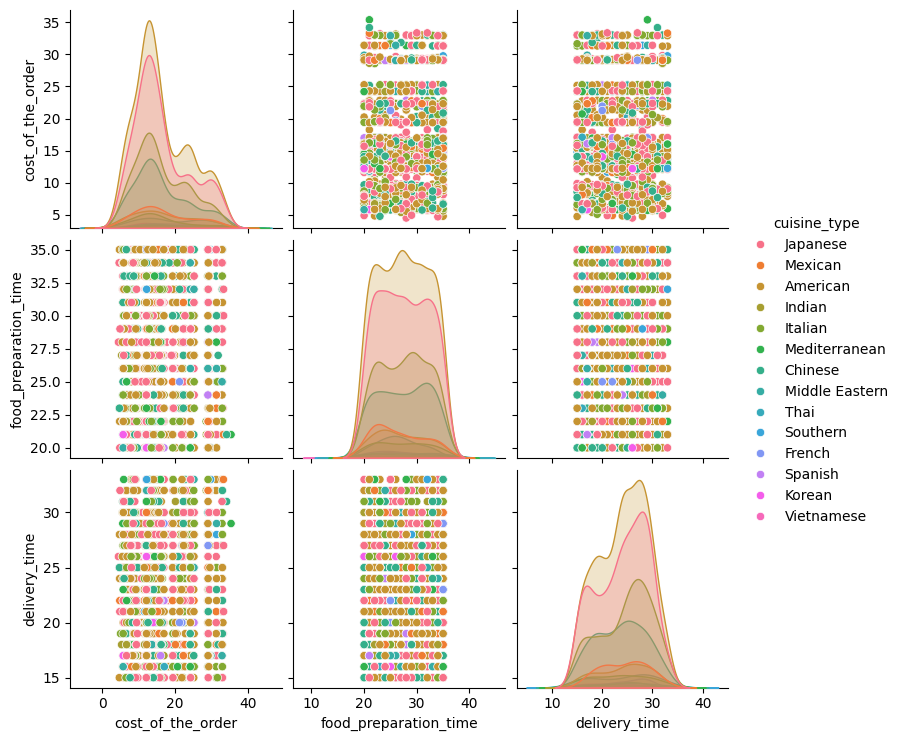

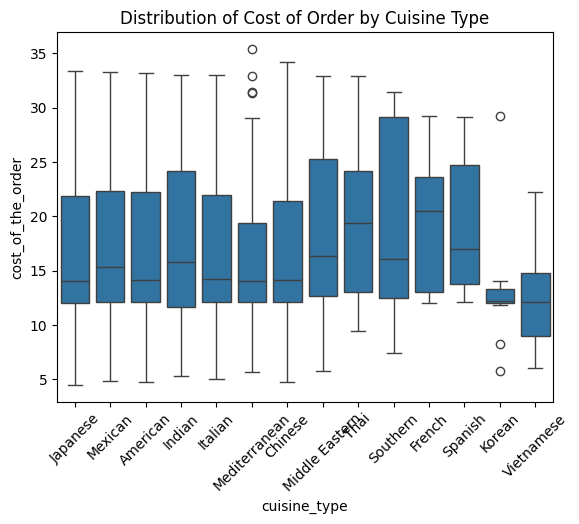

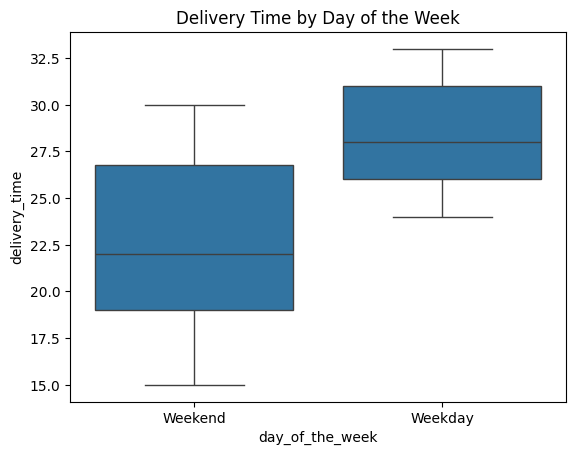

In [25]:
# Write the code here

# Correlation analysis
numeric_columns = FoodHub.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
sns.pairplot(FoodHub, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'])
plt.show()

# Pair plots
sns.pairplot(FoodHub, hue='cuisine_type', vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'])
plt.show()

# Box plots
sns.boxplot(data=FoodHub, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)
plt.title('Distribution of Cost of Order by Cuisine Type')
plt.show()

sns.boxplot(data=FoodHub, x='day_of_the_week', y='delivery_time')
plt.title('Delivery Time by Day of the Week')
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [26]:
# Write the code here
# Step 1: Group the data by restaurant name
restaurant_groups = FoodHub.groupby('restaurant_name')

# Step 2: Calculate count of ratings and average rating for each restaurant
restaurant_ratings = restaurant_groups['rating'].agg(['count', 'mean'])

# Step 3: Filter restaurants based on the criteria
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Print the restaurants fulfilling the criteria
print("Restaurants fulfilling the criteria for promotional offer:")
print(promotional_restaurants)

Restaurants fulfilling the criteria for promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     96  4.327183
Blue Ribbon Sushi            119  4.210509
Parm                          68  4.158371
RedFarm Broadway              59  4.225989
RedFarm Hudson                55  4.195238
Shake Shack                  219  4.279253
The Meatball Shop            132  4.494949


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [27]:
# Write the code here
# Step 1: Calculate the revenue generated by each order
FoodHub['revenue'] = FoodHub['cost_of_the_order']

# Step 2: Apply charges based on the order cost
FoodHub.loc[FoodHub['cost_of_the_order'] > 20, 'revenue'] *= 0.75  # 25% charge for orders > $20
FoodHub.loc[(FoodHub['cost_of_the_order'] <= 20) & (FoodHub['cost_of_the_order'] > 5), 'revenue'] *= 0.85  # 15% charge for orders between $5 and $20

# Step 3: Calculate the net revenue across all orders
net_revenue = FoodHub['revenue'].sum()

# Print the net revenue
print("Net revenue generated by the company across all orders: ${:.2f}".format(net_revenue))


Net revenue generated by the company across all orders: $24269.40


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [28]:
# Write the code here
# Filter data for orders with cost greater than $20
orders_greater_than_60_mins = FoodHub[FoodHub['delivery_time'] > 60]

num_orders_greater_than_60_mins = len(orders_greater_than_60_mins)

# Count the total number of orders
total_orders = len(FoodHub)
#total = FoodHub['order_id'].value_counts()

# Calculate the percentage of orders that cost more than $20
percentage_of_orders_greater_than_60_mins = (num_orders_greater_than_60_mins / total_orders) * 100

print("Percentage of orders greater than 60 mins :", percentage_of_orders_greater_than_60_mins)

Percentage of orders greater than 60 mins : 0.0


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

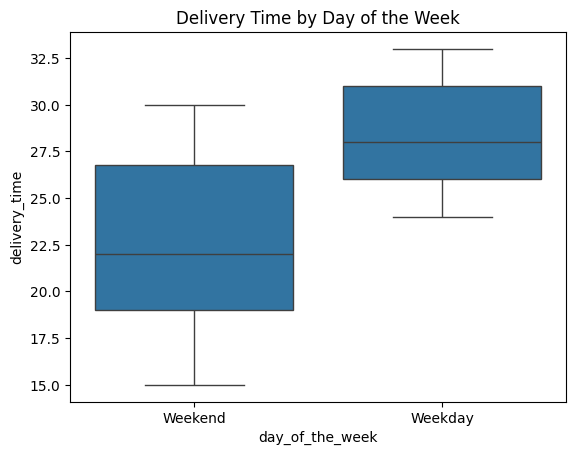

day_of_the_week
Weekday    28.336520
Weekend    22.469466
Name: delivery_time, dtype: float64


In [29]:
# Write the code here
sns.boxplot(data=FoodHub, x='day_of_the_week', y='delivery_time')
plt.title('Delivery Time by Day of the Week')
plt.show()

mean_delivery_time_per_day = FoodHub.groupby('day_of_the_week')['delivery_time'].mean()

# Print the result
print(mean_delivery_time_per_day)

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---